In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
iris = pd.read_csv('/content/iris (1).csv')

# Split features and target
X = iris.drop(columns=['species'])
y = iris['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Display actual vs predicted
results_iris = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("IRIS Dataset - Actual vs Predicted:\n")
print(results_iris)

# Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


IRIS Dataset - Actual vs Predicted:

        Actual   Predicted
0   versicolor  versicolor
1       setosa      setosa
2    virginica   virginica
3   versicolor  versicolor
4   versicolor  versicolor
5       setosa      setosa
6   versicolor  versicolor
7    virginica   virginica
8   versicolor  versicolor
9   versicolor  versicolor
10   virginica   virginica
11      setosa      setosa
12      setosa      setosa
13      setosa      setosa
14      setosa      setosa
15  versicolor  versicolor
16   virginica   virginica
17  versicolor  versicolor
18  versicolor  versicolor
19   virginica   virginica
20      setosa      setosa
21   virginica   virginica
22      setosa      setosa
23   virginica   virginica
24   virginica   virginica
25   virginica   virginica
26   virginica   virginica
27   virginica   virginica
28      setosa      setosa
29      setosa      setosa

Accuracy Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
diabetes = pd.read_csv('/content/diabetes.csv')

# Split features and target
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Display actual vs predicted
results_diabetes = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nDIABETES Dataset - Actual vs Predicted:\n")
print(results_diabetes)

# Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



DIABETES Dataset - Actual vs Predicted:

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          1
..      ...        ...
149       1          1
150       0          0
151       0          0
152       1          0
153       0          0

[154 rows x 2 columns]

Accuracy Score: 0.6948051948051948

Confusion Matrix:
 [[79 20]
 [27 28]]



Best K value: 7 with Accuracy: 0.9180


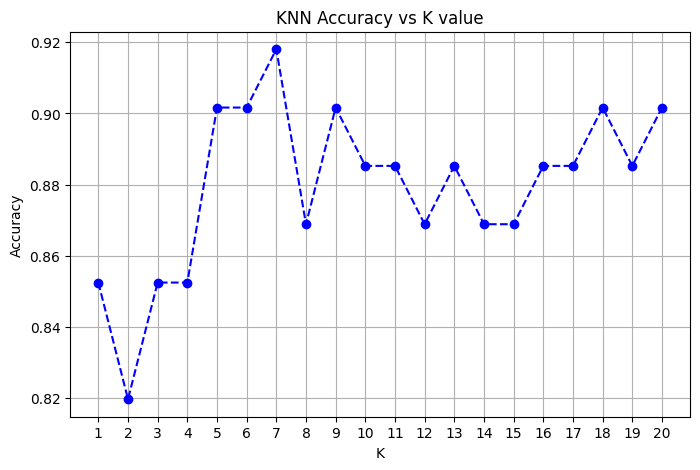

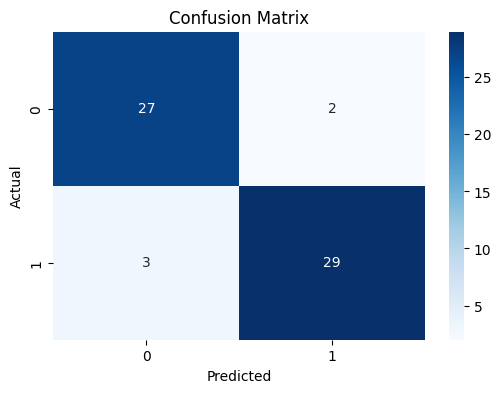


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
heart = pd.read_csv('/content/heart.csv')

# Split features and target
X = heart.drop(columns=['target'])
y = heart['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find best K
best_k = 1
best_score = 0
accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    accuracy_scores.append(score)
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nBest K value: {best_k} with Accuracy: {best_score:.4f}")

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

# Final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
